# <span style="color:darkblue"> Lecture 12: Application 2 - Random Assignment </span>

<font size = "5">



# <span style="color:darkblue"> I. Import Libraries and Data </span>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
carfeatures = pd.read_csv("data_raw/features.csv")

# <span style="color:darkblue"> I. Random Assignment </span>

<font size = "5">

Random assignment is crucial for scientific progress ...

- The basis for medical trials
- Also used in engineering, the natural sciences and <br>
  social sciences (economics, political science, etc.)


In [3]:
# "list_status" is a list with "treatment/control" arms
# "prop_status" is the proportion in the treatment and control arms
# "size_dataset" is how many rows are contained

list_status  = ["Treatment","Control"]
prop_status  = [0.4,0.6]
size_dataset = len(carfeatures)

<font size = "5">
Random assignment


In [4]:
# The "np.random.choice" will create a vector with the status
# We will save this to a column in "carfeatures"
# Note: (i) We can always split the arguments of a function in multiple lines
#           to make it easier to read

carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)

display(carfeatures)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
0,18.0,8,307,130,3504,12.0,C-1689780,Control
1,15.0,8,350,165,3693,11.5,B-1689791,Treatment
2,18.0,8,318,150,3436,11.0,P-1689802,Control
3,16.0,8,304,150,3433,12.0,A-1689813,Control
4,17.0,8,302,140,3449,10.5,F-1689824,Control
...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Treatment
394,44.0,4,97,52,2130,24.6,V-1694114,Control
395,32.0,4,135,84,2295,11.6,D-1694125,Treatment
396,28.0,4,120,79,2625,18.6,F-1694136,Treatment


<font size = "5">

Compute frequencies by status

In [5]:
# The command "pd.crosstab" computes frequencies
# If we add the option "normalize" it will compute proportions
# Note: The default assignment is done randomly without replacement
#       which means that the proportions are approximately the same   
#       (but not equal) to "prop_status"

frequency_table   = pd.crosstab(index = carfeatures["status"], columns = "Frequency")
proportions_table = pd.crosstab(index = carfeatures["status"],
                                columns = "Frequency",
                                normalize = True)

display(frequency_table)
display(proportions_table)


col_0,Frequency
status,
Control,238
Treatment,160


col_0,Frequency
status,
Control,0.59799
Treatment,0.40201


<font size = "5">

Query with string conditions

In [6]:
# When you have queries for text variables, it's important
# to use outer ' ' single quotations
# and inner double quotations.

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')

<font size = "5">

Treated/control should be similar

- This is the key principle of random assignment
- We can check the summary statistics

In [7]:
# The count is different because we assigned different proportions
# All other sumary statistics are approximately the same
# They are not identical because the assignment is random

display(data_treated.describe())
display(data_control.describe())

,mpg,cylinders,displacement,weight,acceleration
count,160.000000,160.00000,160.000000,160.000000,160.000000
mean,23.521875,5.39375,191.575000,2940.731250,15.188125
std,7.796045,1.73784,107.674302,864.619258,2.644096
min,9.000000,3.00000,68.000000,1773.000000,8.500000
25%,17.500000,4.00000,98.000000,2219.750000,13.500000
50%,23.000000,4.00000,140.000000,2674.500000,14.950000
75%,29.000000,8.00000,272.000000,3677.250000,16.900000
max,46.600000,8.00000,454.000000,4997.000000,23.500000


,mpg,cylinders,displacement,weight,acceleration
count,238.000000,238.000000,238.000000,238.000000,238.000000
mean,23.509664,5.495798,194.672269,2990.386555,15.823529
std,7.845773,1.678225,102.125976,835.918344,2.808132
min,10.000000,3.000000,70.000000,1613.000000,8.000000
25%,17.125000,4.000000,107.000000,2245.250000,14.050000
50%,22.000000,4.500000,151.000000,2895.500000,15.600000
75%,29.000000,8.000000,261.500000,3556.000000,17.475000
max,44.600000,8.000000,455.000000,5140.000000,24.800000


## <span style="color:darkblue"> III. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)


<font size = "5">

(a) Create a function and apply it to a column

- Check Lecture 8 for how to define a function
- The function will have if/else statements and output a string
- You will use ".apply()" to create a new variable in the dataset <br>
(see Lecture 9)

In [8]:
def fn_weight(weight):
    if (weight < 2400):
        status = "light"
    elif (weight >= 2400) & (weight < 3200):
        status = "medium"
    else:
        status = "heavy"
    return(status)

carfeatures["new_weight"] = carfeatures["weight"].apply(fn_weight)
display(carfeatures)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status,new_weight
0,18.0,8,307,130,3504,12.0,C-1689780,Control,heavy
1,15.0,8,350,165,3693,11.5,B-1689791,Treatment,heavy
2,18.0,8,318,150,3436,11.0,P-1689802,Control,heavy
3,16.0,8,304,150,3433,12.0,A-1689813,Control,heavy
4,17.0,8,302,140,3449,10.5,F-1689824,Control,heavy
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Treatment,medium
394,44.0,4,97,52,2130,24.6,V-1694114,Control,light
395,32.0,4,135,84,2295,11.6,D-1694125,Treatment,light
396,28.0,4,120,79,2625,18.6,F-1694136,Treatment,medium


<font size = "5">

(b) Use queries + global variables

- You will be asked to compute certain summary statistics <br>
(mean, median, etc)
- The query will have multiple conditions
- Then subset a dataset that meets certain conditions
- See Lecture 10 for more details

In [9]:
median = carfeatures["mpg"].median()
mean = carfeatures["mpg"].mean()

#extract column names
car_colnames = carfeatures.columns.values

#subset columns 
display(carfeatures[["weight","mpg"]])

#in descending order 
carsorted = carfeatures.sort_values(by = "mpg", ascending = False)

# Extract rows 0 to 5
display(carfeatures.iloc[0:5,:])

data_rangeweight    = carfeatures.query("(acceleration >= 10) & (acceleration < 18)")

threshold = 25
data_varthreshold_mpg = carfeatures.query("mpg >= @threshold")


data_mpg_medain = carfeatures.query("mpg >= @median")

,weight,mpg
0,3504,18.0
1,3693,15.0
2,3436,18.0
3,3433,16.0
4,3449,17.0
...,...,...
393,2790,27.0
394,2130,44.0
395,2295,32.0
396,2625,28.0


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status,new_weight
0,18.0,8,307,130,3504,12.0,C-1689780,Control,heavy
1,15.0,8,350,165,3693,11.5,B-1689791,Treatment,heavy
2,18.0,8,318,150,3436,11.0,P-1689802,Control,heavy
3,16.0,8,304,150,3433,12.0,A-1689813,Control,heavy
4,17.0,8,302,140,3449,10.5,F-1689824,Control,heavy


<font size = "5">

(c) Use sorting + ".iloc[]"

- Extract the observations with the largest values of a column
- See Lecture 10 for details

In [13]:
car_ascendingmpg = carfeatures.sort_values(by = "mpg", ascending = False)

display(car_ascendingmpg.iloc[ 0:5, :])

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status,new_weight
322,46.6,4,86,65,2110,17.9,M-1693322,Treatment,light
329,44.6,4,91,67,1850,13.8,H-1693399,Control,light
325,44.3,4,90,48,2085,21.7,V-1693355,Control,light
394,44.0,4,97,52,2130,24.6,V-1694114,Control,light
326,43.4,4,90,48,2335,23.7,V-1693366,Control,light


In [11]:
carfeatures.nlargest(1, ["mpg"])
carfeatures.nlargest(1, ["weight"])

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status,new_weight
44,13.0,8,400,175,5140,12.0,P-1690264,Control,heavy


<font size = "5">

(d) Split a dataset into subsets

- You will be asked to randomly assign a status to each row
- Split the data into separate datasets using ".query()"
- This will closely follow the material in Lecture 12 (this one)
- You will need this result to answer questions (e), (f)


In [14]:
list_status  = ["Real","Model"]
prop_status  = [0.65,0.35]
size_dataset = len(carfeatures)

carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)

display(carfeatures)

data_real = carfeatures.query('status == "Real" ')
data_model = carfeatures.query('status == "Model" ')

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status,new_weight
0,18.0,8,307,130,3504,12.0,C-1689780,Model,heavy
1,15.0,8,350,165,3693,11.5,B-1689791,Model,heavy
2,18.0,8,318,150,3436,11.0,P-1689802,Model,heavy
3,16.0,8,304,150,3433,12.0,A-1689813,Real,heavy
4,17.0,8,302,140,3449,10.5,F-1689824,Real,heavy
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Real,medium
394,44.0,4,97,52,2130,24.6,V-1694114,Model,light
395,32.0,4,135,84,2295,11.6,D-1694125,Model,light
396,28.0,4,120,79,2625,18.6,F-1694136,Model,medium


<font size = "5">

(e) Create a function with four inputs $f(y,x,b0,b1)$

- Start by using "def" to define the function
- The function will include arithmetic operations (Lecture 3) <br>
and summary statistics for pandas (mean, std, min, max, etc.)
- You will be asked to test different values of $(y,x,b0,b1)$
- You will get $y$ and $x$ from the two datasets in part (d)
- Note: You will **not** be required to use the "statsmodels" library


In [20]:
dataset = pd.DataFrame([])
x = data_real["mpg"].mean()
y = data_model["acceleration"].mean()

def fn(y, x, b0, b1):
    fn = y + x**2 + 3*b0 - b1
    return(fn)


print(fn(y, x, b0 = 10, b1 = 33))

578.5363884083046


<font size = "5">

(f) Create two overlapping histogram plots

- You will use a variable from the two datasets in (d)
- You need to use the "alpha" option to make the graphs semitransparent
- You will need to add a legend, label the axes, and the title
- Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

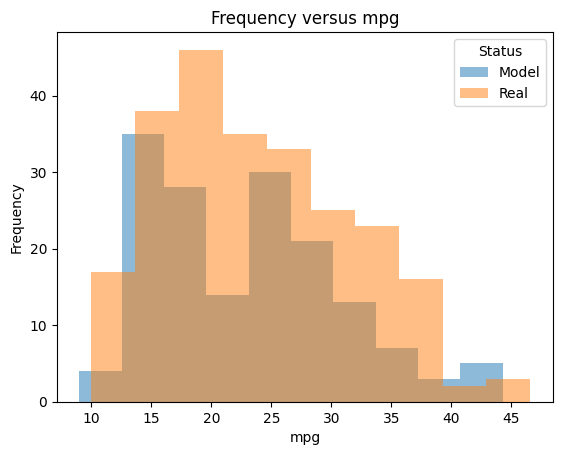

In [21]:
list_unique_status = pd.unique(carfeatures["status"])

for category in list_unique_status:
    df   = carfeatures.query("status == @category")
    plt.hist(x = df["mpg"], alpha = 0.5)

plt.xlabel("mpg")
plt.ylabel("Frequency")
plt.legend(labels = list_unique_status,
           title  = "Status")
plt.title("Frequency versus mpg")
plt.show()